# Cinétique d'ordre 1

Les deux premières cellules permettent de rendre actif le Notebook pendant 2h même si vous ne le sollicitez pas.

In [1]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 480000);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                

        }
    );""")

<IPython.core.display.Javascript object>

In [2]:
import os
from IPython.display import HTML
l = os.popen("jupyter notebook list").readlines()
token = l[1].split("?token=")[1].split(" :: ")[0]
url2=url +"?token="+token
print("lien à partager si besoin d'aide")
display(HTML("<a href="+url2+" >"+url2+"</a>"))

lien à partager si besoin d'aide


Le programme ne commence en rélité qu'ici.

1ère étape:on importe les bibliothèques.

In [3]:
from math import * 
import  matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

2ème étape on rentre les variables (grandeurs) et on effectue les calculs associés.On détermine les grandeurs à représenter et on trace la courbe.

ln(c)= -0.03049473186016416 t+ 4.825444726521105 coef. de corr. = -0.9999954939887647


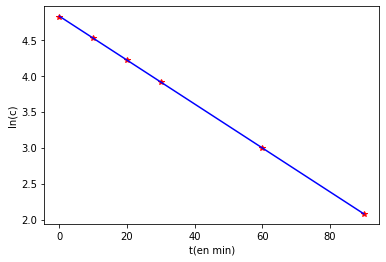

In [4]:
# définition extensive d'une liste (extrait d'un tableau de mesures)
listet=[0.0,10.0,20.0,30.0,60.0,90.0]
listec=[124.0,92.0,68.0,50.0,20.0,8.0]
listelnc=[0.0,0.0,0.0,0.0,0.0,0.0]
modelelinY=[0.0,0.0,0.0,0.0,0.0,0.0]

# calcul de la liste des logarithmes des concentrations
for i in range (0,6):
    listelnc[i]=np.log(listec[i])

# tracé du graphique donnant ln (c) en fonction de t
plt.plot(listet,listelnc,"*",color="red")

# calcul des paramètres de la régression linéaire
(a,b,rho,_,_)=linregress(listet,listelnc)
# a: coefficient directeur
# b: ordonnée à l'origine
# rho: coefficient de corrélation linéaire
print("ln(c)=",a,"t+",b,"coef. de corr. =",rho)
for i in range (0,6):
    modelelinY[i]=a*listet[i]+b

# tracé de la droite de régression linéaire
plt.plot(listet,modelelinY,color="blue")
plt.xlabel("t(en min)")
plt.ylabel("ln(c)")
plt.show()